In [1]:
import numpy as np
import os
import cv2
import random
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten

In [4]:
data_dir = r"..\datas\train"
data_dir_test = r"..\datas\test"
categories = ["fundusImage","other"]
img_size = 128

In [5]:
training_data = []

def create_training_data():
    for category in categories:
        path = os.path.join(data_dir, category)
        class_num = categories.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (img_size, img_size))
                training_data.append([new_array, class_num])
            except Exception as e:
                print(e)
                pass

create_training_data() 

In [6]:
random.shuffle(training_data)
x_training = []
y_training = []

for features, label in training_data:
    x_training.append(features)
    y_training.append(label)
    
x_training = np.array(x_training).reshape(-1, img_size, img_size, 1)

In [8]:
# Treinamento #

num_epochs = 10
batch_size = 63
val_split = 0.1
adam = keras.optimizers.Adam(lr=0.002)

x_training = x_training/255.0

model = Sequential()

model.add(Flatten(input_shape=x_training.shape[1:]))
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(32, activation="relu"))
model.add(Dense(16, activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(2, activation="softmax"))

model.compile(optimizer=adam, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
hist = model.fit(x_training, y_training, batch_size=batch_size, validation_split=val_split, epochs=num_epochs, shuffle=True)
model.save('trainingDL.model')

Train on 630 samples, validate on 70 samples
Epoch 1/10
630/630 [==============================] - 1s 1ms/sample - loss: 0.6841 - acc: 0.5651 - val_loss: 0.6388 - val_acc: 0.8857
Epoch 2/10
630/630 [==============================] - 0s 596us/sample - loss: 0.6103 - acc: 0.7810 - val_loss: 0.4632 - val_acc: 1.0000
Epoch 3/10
630/630 [==============================] - 0s 601us/sample - loss: 0.3317 - acc: 0.9778 - val_loss: 0.0890 - val_acc: 1.0000
Epoch 4/10
630/630 [==============================] - 0s 625us/sample - loss: 0.0881 - acc: 0.9889 - val_loss: 0.0054 - val_acc: 1.0000
Epoch 5/10
630/630 [==============================] - 0s 623us/sample - loss: 0.0776 - acc: 0.9889 - val_loss: 0.0024 - val_acc: 1.0000
Epoch 6/10
630/630 [==============================] - 0s 620us/sample - loss: 0.0721 - acc: 0.9905 - val_loss: 0.0138 - val_acc: 1.0000
Epoch 7/10
630/630 [==============================] - 0s 624us/sample - loss: 0.0524 - acc: 0.9905 - val_loss: 0.0123 - val_acc: 1.0000
Epoch

In [9]:
test_data = []

def create_test_data():
    for category in categories:
        path = os.path.join(data_dir_test, category)
        class_num = categories.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (img_size, img_size))
                test_data.append([new_array, class_num])
            except Exception as e:
                pass

create_test_data()   

In [10]:
# Testes

random.shuffle(test_data)

x_test = []
y_test = []

for features, label in test_data:
    x_test.append(features)
    y_test.append(label)
    
x_test = np.array(x_test).reshape(-1, img_size, img_size, 1)
prediction = model.predict(x_test)
loss, accuracy = model.evaluate(x_test, y_test)

300/300 [==============================] - 0s 180us/sample - loss: 0.0000e+00 - acc: 1.0000


Resultado teste: 0
Número da imagem de teste: 0


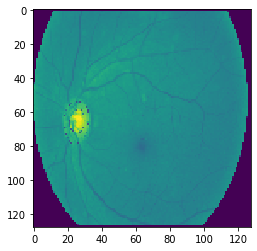

In [15]:
print('Resultado teste:', np.argmax(prediction[80]))
print('Número da imagem de teste:', y_test[80])
plt.imshow(test_data[80][0])

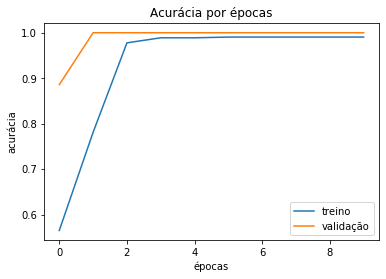

In [16]:
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Acurácia por épocas')
plt.xlabel('épocas')
plt.ylabel('acurácia')
plt.legend(['treino', 'validação'])

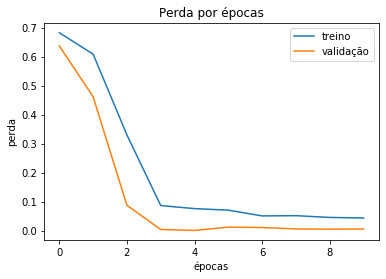

In [17]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Perda por épocas')
plt.xlabel('épocas')
plt.ylabel('perda')
plt.legend(['treino', 'validação'])